In [1]:
import scqubits as scq
import numpy as np

In [2]:
kite = scq.Circuit('''branches:
- [JJ, 2,3, 5.9, 6.6]
- [JJ, 2,4, 5.9, 6.6]
- [L, 1,2, 0.23]
- [C, 1,2, 2.5]
- [L, 1,3, 0.36]
- [L, 1,4, 0.36]
''',from_file=False)

trans_mat = np.array([[ -1, -1, -1, 1],
[ -1, -1, 3, 1],
[ -1, 3, -1, 1],
[ 3, -1, -1, 1]])*0.25
closure_branches = [kite.branches[-2], kite.branches[-1]]
kite.configure(transformation_matrix=trans_mat, closure_branches=closure_branches)
kite.cutoff_ext_1 = 30
kite.cutoff_ext_2 = 30
kite.cutoff_ext_3 = 30
eigs = kite.eigenvals()
eigs - eigs[0]

array([0.        , 2.30607437, 3.09377189, 4.3808254 , 4.54538786,
       5.05048285])

In [3]:
kite.__dir__()

['_frozen',
 '_sys_type',
 '_id_str',
 '_image_filename',
 'evals_method',
 'evals_method_options',
 'esys_method',
 'esys_method_options',
 'is_child',
 'symbolic_circuit',
 'ext_basis',
 'hierarchical_diagonalization',
 'truncated_dim',
 'system_hierarchy',
 'subsystem_trunc_dims',
 'operators_by_name',
 'discretized_phi_range',
 'cutoff_names',
 '_default_grid_phi',
 'type_of_matrices',
 'branches',
 'closure_branches',
 'external_fluxes',
 'ground_node',
 'hamiltonian_symbolic',
 'input_string',
 'is_grounded',
 'lagrangian_node_vars',
 'lagrangian_symbolic',
 'nodes',
 'offset_charges',
 'free_charges',
 'potential_symbolic',
 'potential_node_vars',
 'symbolic_params',
 'transformation_matrix',
 'var_categories',
 '_init_params',
 '_out_of_sync',
 'is_purely_harmonic',
 '_cutoff_ext_1',
 '_cutoff_ext_2',
 '_cutoff_ext_3',
 'dynamic_var_indices',
 '_Φ1',
 '_Φ2',
 '_hamiltonian_sym_for_numerics',
 'junction_potential',
 'vars',
 'θ1_operator',
 'θ2_operator',
 'θ3_operator',
 'cosθ1

In [17]:
fluxonium_coupler = scq.Circuit(
'''branches:
- [JJ,5,1,4.6,0.9]
- [L,1,2,0.21]
- [L,5,2,2.0]
- [C,5,2,50]
- [JJ,2,3,3,16.6]
- [L,5,3,2.0]
- [C,5,3,50]
- [L,3,4,0.21]
- [JJ,4,5,5.5,0.9]''',from_file=False, ext_basis="harmonic",
initiate_sym_calc=False, basis_completion="canonical")
system_hierarchy = [[1], [2], [3], [4]]
closure_branches = [fluxonium_coupler.branches[i] for i in [0, 4, -1]]
fluxonium_coupler.configure(closure_branches=closure_branches, system_hierarchy=system_hierarchy,
subsystem_trunc_dims = [6, 6, 6, 6])
fluxonium_coupler.Φ1 = 0.5 + 0.01768
fluxonium_coupler.Φ2 = -0.2662
fluxonium_coupler.Φ3 = -0.5 + 0.01768
fluxonium_coupler.cutoff_ext_1 = 110
fluxonium_coupler.cutoff_ext_2 = 110
fluxonium_coupler.cutoff_ext_3 = 110
fluxonium_coupler.cutoff_ext_4 = 110
eigs = fluxonium_coupler.eigenvals()
eigs - eigs[0]

array([0.        , 0.03559404, 0.05819727, 0.09378676, 4.39927874,
       4.43488613])

In [ ]:
zero_pi = scq.Circuit("""# zero-pi
branches:
- ["JJ", 1,2, EJ = 10, 20]
- ["JJ", 3,4, EJ, 20]
- ["L", 2,3, 0.008]
- ["L", 4,1, 0.008]
- ["C", 1,3, 0.02]
- ["C", 2,4, 0.02]
""",from_file=False)

In [18]:
zero_pi.sym_lagrangian(return_expr=True,vars_type="new",print_latex=True)

(25.0*\dot{θ_2}**2 + 0.00625*\dot{θ_3}**2 + 6.25625*\dot{θ_1}**2) + (-0.008*θ3**2 - 0.032*θ2**2 + EJ*cos(θ1 + θ3) + EJ*cos(θ1 + 1.0*(2πΦ_{1}) - 1.0*θ3))

In [17]:
zero_pi.sym_hamiltonian(return_expr=True,print_latex=True)

(40.0*Q3**2 + 0.03996*n1**2 + 0.03996*n_g1**2 + 0.01*Q2**2 + 0.07992*n1*n_g1) + (0.008*θ3**2 + 0.032*θ2**2 - EJ*cos(θ1 + θ3) - EJ*cos((2πΦ_{1}) + θ1 - 1.0*θ3))

In [16]:
zero_pi.sym_potential(return_expr=True,print_latex=True)

0.008 θ_{3}^{2} + 0.032 θ_{2}^{2} - EJ \cos{\left(θ_{1} + θ_{3} \right)} - EJ \cos{\left((2πΦ_{1}) + θ_{1} - 1.0 θ_{3} \right)}


<IPython.core.display.Latex object>

(<Figure size 640x480 with 2 Axes>,
 <Axes: xlabel='$\\theta_{1}$', ylabel='$\\theta_{3}$'>)

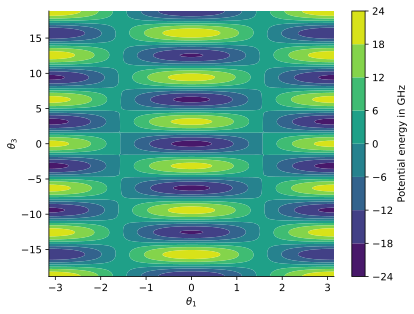

In [25]:
zero_pi.plot_potential(θ1=np.linspace(-np.pi, np.pi),
                       θ3=np.linspace(-6*np.pi, 6*np.pi, 200),
                       θ2 = 0.) # of 

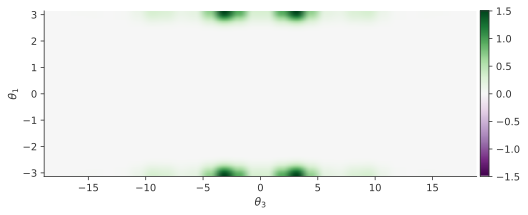

In [39]:
zero_pi.plot_wavefunction(which=0, var_indices=(1,3));

In [32]:
for method_name in zero_pi.__dir__():
    if method_name.endswith("operator"):
        print(method_name)

sinθ1_operator
cosθ1_operator
n1_operator
θ2_operator
θ3_operator
cosθ2_operator
cosθ3_operator
sinθ2_operator
sinθ3_operator
Q2_operator
Q3_operator
Qs2_operator
Qs3_operator
I_operator
_kron_operator
exp_i_operator
_replace_mat_mul_operator


In [37]:
zero_pi.Q2_operator()

<Compressed Sparse Column sparse matrix of dtype 'complex128'
	with 55440 stored elements and shape (9900, 9900)>